In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [44]:
np.random.seed(28)

n_rows = 30

data = {
    'product_id': np.arange(1, n_rows + 1),
    'avg_daily_sales': np.random.randint(1, 50, n_rows),
    'days_in_stock': np.random.randint(1, 120, n_rows),
    'current_stock': np.random.randint(10, 300, n_rows),
    'discount_rate': np.round(np.random.uniform(0.05, 0.7, n_rows), 2),
    'dead_stock_label': np.random.randint(0, 2, n_rows)
}

df = pd.DataFrame(data)

print(df.head())
print("\nShape of dataset:", df.shape)


   product_id  avg_daily_sales  days_in_stock  current_stock  discount_rate  \
0           1                2            110            135           0.12   
1           2                6             16            268           0.49   
2           3               23             27            112           0.43   
3           4               33              5            140           0.62   
4           5                4              8             41           0.70   

   dead_stock_label  
0                 1  
1                 1  
2                 1  
3                 1  
4                 0  

Shape of dataset: (30, 6)


In [39]:
X = df[['avg_daily_sales', 'days_in_stock', 'current_stock', 'discount_rate']]
y = df['dead_stock_label']

In [40]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X, y)

RandomForestClassifier(n_estimators=50, random_state=42)

In [41]:
df['risk_score'] = model.predict_proba(X)[:, 1] * 100
df['risk_score'] = df['risk_score'].round(2)

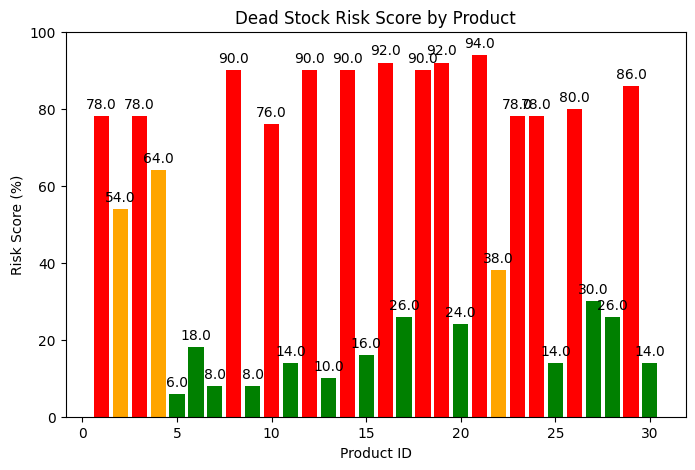

In [43]:
import matplotlib.pyplot as plt

def risk_color(score):
    if score <= 30:
        return 'green'
    elif score <= 70:
        return 'orange'
    else:
        return 'red'

colors = df['risk_score'].apply(risk_color)

plt.figure(figsize=(8,5))
plt.bar(df['product_id'], df['risk_score'], color=colors)
plt.xlabel('Product ID')
plt.ylabel('Risk Score (%)')
plt.title('Dead Stock Risk Score by Product')
plt.ylim(0, 100)

# Add text labels on top of bars
for i, score in enumerate(df['risk_score']):
    plt.text(df['product_id'][i], score + 2, str(score), ha='center')

plt.show()